In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
import random
from lmfit.models import StepModel, LinearModel

np.random.seed(seed=233423)


In [2]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b


def RhoSq(y_hat, y_true): # like in Turchin's original PCA paper
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )


In [3]:
Data = pd.read_excel("SPC1_Final.xlsx")

#
Maximum = max(Data.SPC)
Minimum = min(Data.SPC)
Data.SPC = (Data.SPC-Minimum)/(Maximum-Minimum) 
print(Minimum, Maximum)
print(min(Data.SPC), max(Data.SPC))

2.30065881002946 8.26820181756822
0.0 1.0


In [4]:
len(set(Data.PolID))

370

In [5]:
Data.query("NGA == 'Iceland'")

,NGA,PolID,Time,RelTime,SPC,Culture.Cont,Polity.Cont,Notes
347,Iceland,IsCommw,1000,NaN,0.308926,NaN,NewSeq,NaN
348,Iceland,IsCommw,1100,NaN,0.353376,NaN,NaN,NaN
349,Iceland,IsCommw,1200,NaN,0.405888,NaN,NaN,NaN
350,Iceland,NorKing,1300,NaN,0.474129,NaN,NaN,NaN


In [6]:
reltime = Data["RelTime"].copy()
del Data["RelTime"] # artefact of data preprocessing 

In [7]:
len(set(Data.NGA))

35

In [8]:
Data.head(), Data.columns

(               NGA    PolID  Time       SPC Culture.Cont Polity.Cont Notes
 0  Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   NaN
 1  Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   NaN
 2  Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   NaN
 3  Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   NaN
 4  Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   NaN,
 Index(['NGA', 'PolID', 'Time', 'SPC', 'Culture.Cont', 'Polity.Cont', 'Notes'], dtype='object'))

In [9]:
Data = Data.rename(columns = {"SPC": "PC1"})
Data.head(), Data.columns

(               NGA    PolID  Time       PC1 Culture.Cont Polity.Cont Notes
 0  Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   NaN
 1  Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   NaN
 2  Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   NaN
 3  Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   NaN
 4  Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   NaN,
 Index(['NGA', 'PolID', 'Time', 'PC1', 'Culture.Cont', 'Polity.Cont', 'Notes'], dtype='object'))

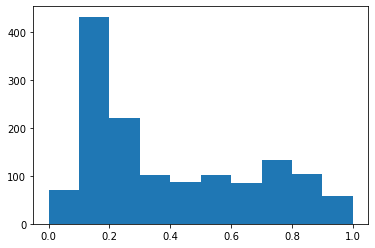

0.29682804546734304


In [10]:
plt.hist(Data.PC1)
plt.show()

print(np.median(Data.PC1))

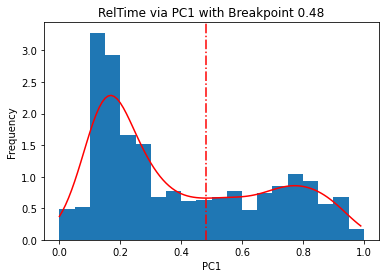

In [11]:
plt.hist(Data["PC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)

#KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
KDE_min = np.min(KDE[35:65])  # find the minimum in the centre


xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via PC1 with Breakpoint "+str(np.round(xmin[0],2)))
plt.xlabel("PC1")
plt.ylabel("Frequency")
plt.show()

PC_Break = xmin



In [12]:
print("Rescaled Breakpoint",PC_Break * (Maximum-Minimum)  + Minimum)


Rescaled Breakpoint [5.16507945]


In [13]:
#Data = pd.read_excel("sc.pc.15May2023.xlsx")

Data2 = pd.read_excel("SPC1Dat.Relation_Pol_Culture.xlsx", index_col = 0)
Maximum2 = max(Data2.SPC)
Minimum2 = min(Data2.SPC)
Data2.SPC = (Data2.SPC-Minimum2)/(Maximum2-Minimum2) 
print(Minimum2, Maximum2)
print(min(Data2.SPC), max(Data2.SPC))

2.30065881002946 8.26820181756822
0.0 1.0


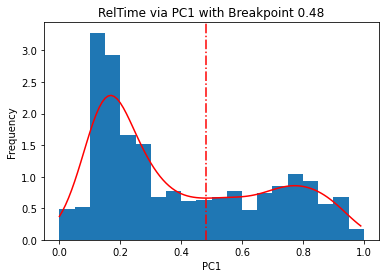

Rescaled Breakpoint [5.16507945]


In [14]:
plt.hist(Data2["SPC"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE2 = gaussian_kde(Data2["SPC"])(x)

#KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
KDE_min2 = np.min(KDE2[35:65])  # find the minimum in the centre


xmin2 = x[KDE2 == KDE_min2] # x-position of the minimum
plt.plot(x, KDE2, c="red")
plt.axvline(xmin2, linestyle="-.",c="red", )
plt.title("RelTime via PC1 with Breakpoint "+str(np.round(xmin2[0],2)))
plt.xlabel("PC1")
plt.ylabel("Frequency")
plt.show()

PC_Break2 = xmin2

print("Rescaled Breakpoint",PC_Break2 * (Maximum2-Minimum2)  + Minimum2)


In [15]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []
SmallNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["PC1"]) > PC_Break # Is this polity large enough to cross the PC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    else:
        SmallNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

35
Is Southern Mesopotamia large enough? [ True]
Is Lena River Valley large enough? [False]
Is Crete large enough? [ True]
Is Niger Inland Delta large enough? [ True]
Is Oro PNG large enough? [False]
Is Southern China Hills large enough? [False]
Is Konya Plain large enough? [ True]
Is Garo Hills large enough? [False]
Is Middle Ganga large enough? [ True]
Is Deccan large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Iceland large enough? [False]
Is Latium large enough? [ True]
Is Chuuk Islands large enough? [False]
Is Cahokia large enough? [False]
Is Big Island Hawaii large enough? [False]
Is Paris Basin large enough? [ True]
Is Yemeni Coastal Plain large enough? [ True]
Is Sogdiana large enough? [ True]
Is Upper Egypt large enough? [ True]
Is Basin of Mexico large enough? [ True]
Is Finger Lakes large enough? [False]
Is Galilee large enough? [ True]
Is Susiana large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Lowland Andes large enough? [False]
Is O

In [16]:
Old_Large = ['Paris Basin', 'Kansai', 'Deccan', 'Susiana', 'Latium', 'Cuzco', 'Orkhon Valley',
             'Central Java', 'Ghanaian Coast', 'Konya Plain', 'Niger Inland Delta', 'Kachi Plain', 
             'Iceland', 'Cambodian Basin', 'Upper Egypt', 'Middle Yellow River Valley', 'Yemeni Coastal Plain',
             'Sogdiana']


for nga in Old_Large:
    print(nga, nga in LargeNGAs)
    
print("New:")
for nga in LargeNGAs:
    if nga not in Old_Large:
        print(nga)

Paris Basin True
Kansai True
Deccan True
Susiana True
Latium True
Cuzco True
Orkhon Valley True
Central Java True
Ghanaian Coast True
Konya Plain True
Niger Inland Delta True
Kachi Plain True
Iceland False
Cambodian Basin True
Upper Egypt True
Middle Yellow River Valley True
Yemeni Coastal Plain True
Sogdiana True
New:
Southern Mesopotamia
Crete
Middle Ganga
Basin of Mexico
Galilee
Valley of Oaxaca


## Find their RelTimes

In [17]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA].copy()
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["PC1"]> PC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "PC1"]])
    print(" ________________________ ")

                       NGA    PolID  Time       PC1 Culture.Cont Polity.Cont  \
0          Basin of Mexico  MxArch* -6000  0.152382          NaN         NaN   
1          Basin of Mexico  MxArch* -5900  0.152382          NaN         NaN   
2          Basin of Mexico  MxArch* -5800  0.152382          NaN         NaN   
3          Basin of Mexico  MxArch* -5700  0.152382          NaN         NaN   
4          Basin of Mexico  MxArch* -5600  0.152382          NaN         NaN   
...                    ...      ...   ...       ...          ...         ...   
1391  Yemeni Coastal Plain  YeRasul  1400  0.730293          NaN         NaN   
1392  Yemeni Coastal Plain  YeTahir  1500  0.735025          NaN         NaN   
1393  Yemeni Coastal Plain  TrOttm3  1600  0.976995          NaN         NaN   
1394  Yemeni Coastal Plain  YeQasmi  1700  0.591981          NaN         NaN   
1395  Yemeni Coastal Plain  YeQasmi  1800  0.591981          NaN         NaN   

     Notes  
0      NaN  
1      NaN  


Valley of Oaxaca 1600
      Time       PC1
1310 -3000  0.052452
1311 -2900  0.052452
1312 -2800  0.052452
1313 -2700  0.106401
1314 -2600  0.106401
1315 -2500  0.106401
1316 -2400  0.106401
1317 -2300  0.144671
1318 -2200  0.144671
1319 -2100  0.194166
1320 -2000  0.208494
1321 -1900  0.322724
1322 -1800  0.322724
1323 -1700  0.348109
1324 -1600  0.348109
1325 -1500  0.348109
1326 -1400  0.328304
1327 -1300  0.328304
1328 -1200  0.328304
1329 -1100  0.310826
1330 -1000  0.310826
1331  -900  0.310826
1332  -800  0.301455
1333  -700  0.297684
1334  -600  0.297684
1335  -500  0.297684
1336  -400  0.297684
1337  -300  0.297684
1338  -200  0.297684
1339  -100  0.297684
1340     0  0.934620
1341   100  0.934620
 ________________________ 
Central Java 800
     Time       PC1
140 -1200  0.296600
141 -1100  0.296600
142 -1000  0.296600
143  -900  0.296600
144  -800  0.296600
145  -700  0.296600
146  -600  0.296600
147  -500  0.296600
148  -400  0.296600
149  -300  0.382048
150  -200  0.382048
1

In [18]:
NGA_dat

,NGA,PolID,Time,PC1,Culture.Cont,Polity.Cont,Notes
344,Ghanaian Coast,GhAshnE,-200,0.408044,StartSeq,StartSeq,NaN
345,Ghanaian Coast,GhAshnE,-100,0.408044,continuity,continuity,NaN
346,Ghanaian Coast,GhAshnL,0,0.573746,continuity,continuity,NaN


In [19]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("NEW_TimeZero.csv")
DF_Tzero.transpose(), DF_Tzero.head(23)

(NGA Southern Mesopotamia  Crete Niger Inland Delta Konya Plain Middle Ganga  \
 T0                 -2900  -1700               1000       -2000         -600   
 
 NGA Deccan Kachi Plain Latium Paris Basin Yemeni Coastal Plain  ... Galilee  \
 T0    -300       -2500   -500        -100                  200  ...   -2000   
 
 NGA Susiana Middle Yellow River Valley Orkhon Valley Valley of Oaxaca  \
 T0    -3100                      -1600           500             1600   
 
 NGA Central Java Cuzco Kansai Cambodian Basin Ghanaian Coast  
 T0           800   700    300             300           1800  
 
 [1 rows x 23 columns],
                                T0
 NGA                              
 Southern Mesopotamia        -2900
 Crete                       -1700
 Niger Inland Delta           1000
 Konya Plain                 -2000
 Middle Ganga                 -600
 Deccan                       -300
 Kachi Plain                 -2500
 Latium                       -500
 Paris Basin          

In [20]:
Data_RT = Data_RT.rename(columns={'Time':'RelTime'})

Data_RT.head()

,NGA,PolID,RelTime,PC1,Culture.Cont,Polity.Cont,Notes
1041,Southern Mesopotamia,IqSoNeo,-6100,0.149406,NaN,NaN,NaN
1042,Southern Mesopotamia,IqSoNeo,-6000,0.149406,NaN,NaN,NaN
1043,Southern Mesopotamia,IqSoNeo,-5900,0.149406,NaN,NaN,NaN
1044,Southern Mesopotamia,IqSoNeo,-5800,0.149406,NaN,NaN,NaN
1045,Southern Mesopotamia,IqSoNeo,-5700,0.149406,NaN,NaN,NaN


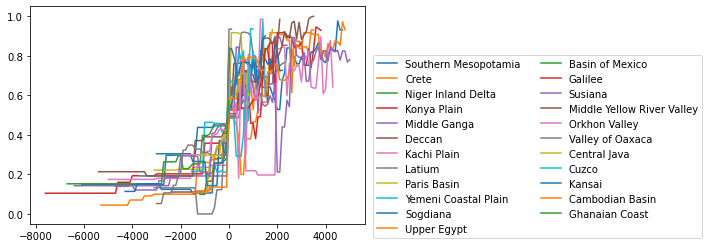

In [21]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["PC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

#### Now the same with SPC1Dat.Relation_Pol_Culture

## Fitting

In [22]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

[0.6414222  0.15295979 8.10204876 0.00981526]
0.6414221967544157 0.15295979307820395 8.102048757081754 0.009815264476072755
-1.52 1.1800000000000024


In [23]:
print(p0)


[0.6414222  0.15295979 8.10204876 0.00981526]


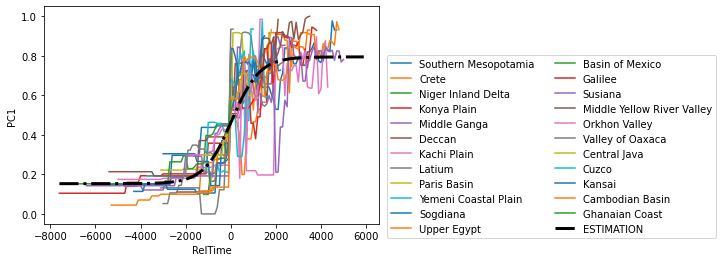

In [24]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["PC1"], label=N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("PC1")
plt.xlabel("RelTime")
plt.show()

##### multiplot of the NGAs


In [25]:
def SpaceToLinebreak(String):
    Stringout = ""
    for i in range(len(String)):
        if String[i] ==" " and i>7:
            Stringout += "\n"
        else:
            Stringout += String[i]
    return(Stringout)


In [26]:
Name2 = "Basin of"
SpaceToLinebreak(Name2)

'Basin of'

Southern Mesopotamia (109, 7)
Crete (89, 7)
Niger Inland Delta (21, 7)
Konya Plain (115, 7)
Middle Ganga (89, 7)
Deccan (45, 7)
Kachi Plain (94, 7)
Latium (55, 7)
Paris Basin (50, 7)
Yemeni Coastal Plain (54, 7)
Sogdiana (53, 7)
Upper Egypt (62, 7)
Basin of Mexico (76, 7)
Galilee (21, 7)
Susiana (98, 7)
Middle Yellow River Valley (90, 7)
Orkhon Valley (34, 7)
Valley of Oaxaca (32, 7)
Central Java (22, 7)
Cuzco (17, 7)
Kansai (59, 7)
Cambodian Basin (31, 7)
Ghanaian Coast (3, 7)


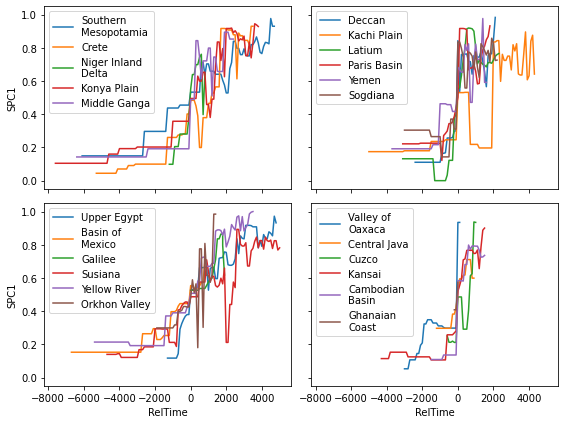

In [27]:
fig, ax = plt.subplots(2, 2, figsize = (8,6), sharey = True, sharex = True)
#fig.suptitle('Horizontally stacked subplots')

nga_number = 1
axis = 0


for N in list(set(Data_RT["NGA"])):
    
    
    i = int(axis/2) 
    j = axis%2
    #print(i,j)
    AX = ax[i,j]
    
    DF = Data_RT[Data_RT["NGA"] == N]
    
    Name = N
    if N == "Middle Yellow River Valley":
        Name = "Yellow River"
    elif N == "Yemeni Coastal Plain":
        Name = "Yemen"
    
    AX.plot(DF["RelTime"],    # ALSO normalised
             DF["PC1"], label=SpaceToLinebreak(Name))
    nga_number += 1
    
    print(N, DF.shape)
    
    if axis != int(nga_number*4/24): # switch to next quarter of plot
        AX.legend()
        axis = int(nga_number*4/24)
    #print(axis)
    
    
ax[1,0].set_xlabel("RelTime")  
ax[1,1].set_xlabel("RelTime")   
 
ax[0,0].set_ylabel("SPC1")   
ax[1,0].set_ylabel("SPC1") 
plt.tight_layout()
plt.savefig("MultiplotOfTimeSeries.pdf", dpi = 200, bbox_inches="tight")

plt.show()


#### Residuals


RMSE 0.11796339685051226
RhoSquared 0.7742861675964825


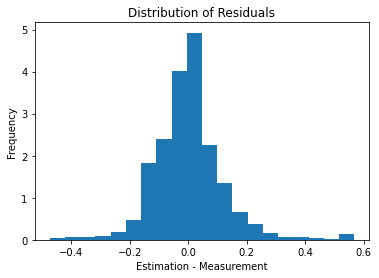

In [28]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y


RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print("RMSE",RMSE)


print("RhoSquared",RhoSq(y_hat = y_Residuals,
           y_true = y_est_Residuals))

plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

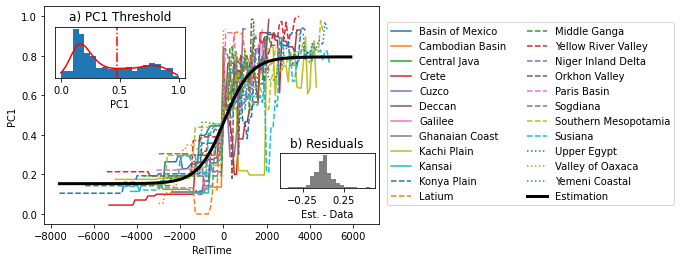

In [29]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.63, 0.3, 0.18]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.67, 0.25, 0.22, 0.12] #[0.25, 0.35, 0.2, 0.08]#
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
#ax1.scatter([-15000,6500], [0.0,1.0], c="white") 
ax1.scatter([-5000,6500], [0.0,1.0], c="white")
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("PC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) PC1 Threshold")
ax2.set_xlabel("PC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals")#": Est. - Data")
ax3.set_xlabel("Est. - Data")
ax3.set_xticks([-0.25,0.25])
ax3.axes.get_yaxis().set_visible(False)

#plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

# Bootstrapping of Full Data

In [30]:
np.random.seed(4321)
random.seed(4321)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Data_RT["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Data_RT.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_RT.query("NGA== @n")])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0, maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF_N = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF_N["PC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
    if i%25==0:    
        print(i,a_, b_, c_, d_)
    #print("-----------------")
#print(Params.round(2))

0 0.6249428612813789 0.14444035395770582 8.64268069998523 0.0032634527070583828
25 0.5992040160078151 0.16867371131615821 12.26203809782681 -0.005948279302783987
50 0.663090284346283 0.14082102180466924 7.705682348522939 0.005077159601927585
75 0.6251324824612626 0.16121058354705733 12.08121278978441 -0.002608984520195052
100 0.5526398084489538 0.17109333814508346 32.42952600924669 -0.01926970205473334
125 0.61087178068249 0.16179167786357093 11.326093046531918 0.0024042784730780643
150 0.6297325362879663 0.15751611990369854 9.080519823481366 0.015822294900269557
175 0.6372201208596836 0.1588910863054833 7.122215926482917 0.005461493284085386
200 0.675841703505515 0.15222251759863561 6.915433284641808 0.029867792761195288
225 0.5610205239460491 0.1871026453572103 20.036295296548104 -0.015008427990014044
250 0.6553183426917235 0.1722018866859591 9.701795696173027 0.03170213461681345
275 0.6709231627452065 0.15483527246686657 9.299026128485835 0.016106398712620873
300 0.6723377977266641 

In [31]:
print("p0", np.round(p0,2))

print(Params.round(2))
i=0
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    print("Parameter", P)
    print("Mean", np.mean(Ps), " and Median", np.median(Ps), "p0", p0[i])
    print("StandardDev",np.std(Ps))
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    print("\n")
    i+=1
    #plt.hist(Ps,bins=20, density= True)
    #plt.plot(P_range, KDE, c="k")
    #plt.title("Parameter "+str(P))
    #plt.show()

p0 [0.64 0.15 8.1  0.01]
       a     b      c     d
0   0.62  0.14   8.64  0.00
0   0.62  0.18  13.03 -0.01
0   0.65  0.13   7.61  0.02
0   0.66  0.15   6.69  0.04
0   0.68  0.12   6.24  0.02
..   ...   ...    ...   ...
0   0.62  0.14   8.65  0.00
0   0.66  0.14   8.01  0.01
0   0.66  0.14   6.61  0.05
0   0.62  0.16   8.88  0.01
0   0.56  0.18  17.55 -0.01

[1000 rows x 4 columns]
Parameter a
Mean 0.639103612915751  and Median 0.6458544329204006 p0 0.6414221967544157
StandardDev 0.04910402172798861
50% centred quantiles 0.6059456581042865 0.6724986899164304
90% centred quantiles 0.5529821052181674 0.7136934124999783


Parameter b
Mean 0.15447411548560636  and Median 0.1541596422936392 p0 0.15295979307820395
StandardDev 0.01569616901717059
50% centred quantiles 0.14286527662908868 0.16495055665330868
90% centred quantiles 0.13056342260511586 0.1822481778376788


Parameter c
Mean 9.58108932871427  and Median 8.197926151825868 p0 8.102048757081754
StandardDev 4.365559323089959
50% centr

In [32]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))


0.15447411548560636 0.01569616901717059
0.7935777284013568 0.03821499779895206


In [33]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Q1 = 0.84 # 1-1sigma
Q2 = 0.16 # 1sigma
#Thresh1 = np.quantile(Params["b"], Q1) #np.quantile(Params["b"], ) + np.std(Params["b"])
#Thresh2 = np.quantile(Params["b"]+Params["a"], Q2)#np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
Thresh1 = np.mean(Params["b"]) + 3*np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - 3*np.std(Params["b"]+Params["a"])
print("Trhesholds",Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

print("T1, T2", T1, T)
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

0.15447411548560636 0.01569616901717059
0.7935777284013568 0.03821499779895206
Trhesholds 0.20156262253711812 0.6789327350045006
T1, T2     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([6.20273277e-12])
       r: array([-0.36394403])
  status: 1
 success: True
       x: array([-0.29889776]) 5000
Most of the cultural evolution takes place in a time interval of  2479.0 years.


In [34]:
Thresh1, Thresh2

(0.20156262253711812, 0.6789327350045006)

In [35]:
Thresh1_1sigma = np.mean(Params["b"]) + 1*np.std(Params["b"])
Thresh2_1sigma = np.mean(Params["b"]+Params["a"]) - 1*np.std(Params["b"]+Params["a"])

def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1_1sigma)

def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2_1sigma)


T1_1sigma = opt.root(f1, -0.5)
T2_1sigma = opt.root(f2, 0.5)

C:\Users\Tobias\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


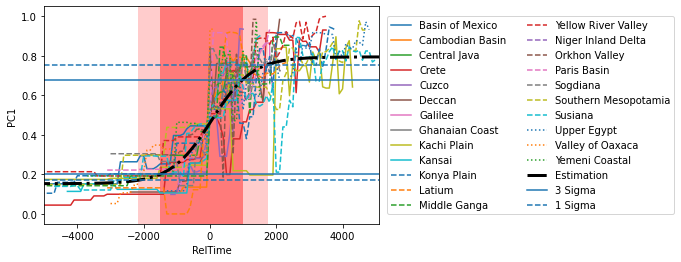

In [36]:

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
plt.scatter([-15000,6500], [0.0,1.0], c="white")    
plt.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
plt.ylabel("PC1")
plt.xlabel("RelTime")

T1_scaled, T2_scaled = T*t_1, T*t_2
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T*T1_1sigma["x"], T*T2_1sigma["x"], facecolor='r', alpha=0.2)

plt.axhline(Thresh1, label="3 Sigma")
plt.axhline(Thresh2)

plt.axhline(Thresh1_1sigma,linestyle = "--", label="1 Sigma")
plt.axhline(Thresh2_1sigma,linestyle = "--")

plt.xlim(-5000,5099)

lgd = plt.legend(ncol = 2,
                bbox_to_anchor=[1.01, 0.5], loc='center left')#bbox_to_anchor=(1.01, 0.95), ncol=2)

plt.savefig("VariousSigmas.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [37]:
T*T1_1sigma["x"][0], T*T2_1sigma["x"][0]

(-2167.011561960442, 1738.0757867421098)

In [38]:
T2_scaled - T1_scaled, T2_1sigma.x*T - T*T1_1sigma.x

(array([2479.38935273]), array([3905.0873487]))

In [39]:
Thresh1, Thresh1_1sigma

(0.20156262253711812, 0.17017028450277694)

In [40]:
T1_scaled, T2_scaled

(array([-1494.48881206]), array([984.90054067]))

In [41]:
T*T1_1sigma["x"], T*T2_1sigma["x"]

(array([-2167.01156196]), array([1738.07578674]))

#### How much time does each NGA take to cross the thresholds?


In [42]:
Thresh1, Thresh2# SPC thresholds

Durations = dict()

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    
    if DF.query("PC1 > @Thresh2").shape[0] > 0:
        T1_N = DF.query("PC1 > @Thresh1").RelTime.to_list()[0]
        T2_N = DF.query("PC1 > @Thresh2").RelTime.to_list()[0]
        Durations[N] = T2_N -T1_N
    
    
    
    
    #print("\n")

In [43]:
durations_np = np.fromiter(Durations.values(), dtype=float)
np.mean(durations_np), np.median(durations_np), np.std(durations_np)

(2236.3636363636365, 2100.0, 1406.0083584859058)

In [44]:
sum(durations_np > 1000)

17

In [45]:
((durations_np > 2500  ) | (durations_np < 2500))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [46]:
Durations

{'Basin of Mexico': 3500,
 'Cambodian Basin': 400,
 'Central Java': 1700,
 'Crete': 3000,
 'Cuzco': 1500,
 'Deccan': 600,
 'Galilee': 1400,
 'Kachi Plain': 3500,
 'Kansai': 900,
 'Konya Plain': 4400,
 'Latium': 500,
 'Middle Ganga': 300,
 'Middle Yellow River Valley': 6000,
 'Niger Inland Delta': 1200,
 'Orkhon Valley': 2400,
 'Paris Basin': 3200,
 'Sogdiana': 3000,
 'Southern Mesopotamia': 3200,
 'Susiana': 2900,
 'Upper Egypt': 2200,
 'Valley of Oaxaca': 2000,
 'Yemeni Coastal Plain': 1400}

## Out-of-Sample Prediction

In [47]:
L = len(Data_RT["RelTime"].to_numpy())

X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

OutOfSample_Eval = list()

for i in range(100):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    #print((a1_, b1_, c1_, d1_))
    OutOfSample_Eval += [RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test)] 
    
OutOfSample_Eval = np.array(OutOfSample_Eval)
print("Accuracy of Out-Of-Sample Prediction is")
print(np.mean(OutOfSample_Eval),"±",np.std(OutOfSample_Eval))

Accuracy of Out-Of-Sample Prediction is
0.8139345728493481 ± 0.01213769243319982


# Now the Snippets

In [48]:
#print(DF_Tzero)
OLD_DF_Tzero = pd.read_csv("TimeZero.csv", index_col = 0)
#print(OLD_DF_Tzero)

DF_Comparison = pd.DataFrame(index = ["OldData", "NewData"])

for nga in DF_Tzero.index:
    
    if nga in OLD_DF_Tzero.columns:
        #print(nga)
        #print(DF_Tzero.loc[nga].T0)
        #print(OLD_DF_Tzero[nga].T0)
        #print("\n")
        
        DF_Comparison[nga] = pd.Series({"OldData": OLD_DF_Tzero[nga].T0,
                                       "NewData": DF_Tzero.loc[nga].T0})
        
    else:
        DF_Comparison[nga] = pd.Series({"OldData": np.nan,
                                       "NewData": DF_Tzero.loc[nga].T0})
DF_Comparison = DF_Comparison.transpose().sort_index() 
DF_Comparison.head()       
DF_Comparison.to_csv("Compare_Anchor_Times.csv",index= True)

In [49]:
DF_Comparison

,OldData,NewData
Basin of Mexico,NaN,700.0
Cambodian Basin,300.0,300.0
Central Java,800.0,800.0
Crete,NaN,-1700.0
Cuzco,1400.0,700.0
Deccan,-300.0,-300.0
Galilee,NaN,-2000.0
Ghanaian Coast,1800.0,1800.0
Kachi Plain,-2500.0,-2500.0
Kansai,400.0,300.0


Basin of Mexico 8 100.0
Cambodian Basin 13 300.0
Central Java 5 800.0
Crete 10 -1000.0
Cuzco 2 1400.0
Deccan 1 -300.0
Galilee 9 -2000.0
Ghanaian Coast 3 1600.0
Kachi Plain 22 -4000.0
Kansai 5 300.0
Konya Plain 17 -3000.0
Latium 12 -700.0
Middle Ganga 3 -600.0
Middle Yellow River Valley 38 -5000.0
Niger Inland Delta 3 1000.0
Orkhon Valley 4 600.0
Paris Basin 10 -1000.0
Sogdiana 2 -500.0
Southern Mesopotamia 19 -4200.0
Susiana 21 -4300.0
Upper Egypt 33 -3800.0
Valley of Oaxaca 2 1600.0
Yemeni Coastal Plain 3 900.0

# Snippets for Cultural Continuity (1st continuity)

In [50]:
#Snippets_DF = pd.read_csv("SPC1Dat.Relation.Continuity.csv", index_col=False)
Snippets_DF = pd.read_excel("SPC1_Final.xlsx")
Snippets_DF = Snippets_DF.fillna("no")
Snippets_DF = Snippets_DF.rename({"Culture.Cont":"Culture_Cont"}, axis = 1)
del Snippets_DF["Notes"]
print(Snippets_DF.head())


               NGA    PolID  Time RelTime       SPC Culture_Cont Polity.Cont
0  Basin of Mexico  MxArch* -6000      no  3.210005           no          no
1  Basin of Mexico  MxArch* -5900      no  3.210005           no          no
2  Basin of Mexico  MxArch* -5800      no  3.210005           no          no
3  Basin of Mexico  MxArch* -5700      no  3.210005           no          no
4  Basin of Mexico  MxArch* -5600      no  3.210005           no          no


In [51]:
continuous = set(("StartSeq", "continuity"))
Snippets_DF = Snippets_DF.query("Culture_Cont in @continuous")
Snippets_DF = Snippets_DF.reset_index(drop = True)
Snippets_DF

,NGA,PolID,Time,RelTime,SPC,Culture_Cont,Polity.Cont
0,Basin of Mexico,MxClass,100,-600.0,4.958509,StartSeq,StartSeq
1,Basin of Mexico,MxClass,200,-500.0,4.958509,continuity,continuity
2,Basin of Mexico,MxClass,300,-400.0,4.958509,continuity,continuity
3,Basin of Mexico,MxClass,400,-300.0,4.958509,continuity,continuity
4,Basin of Mexico,MxClass,500,-200.0,4.958509,continuity,continuity
...,...,...,...,...,...,...,...
277,Valley of Oaxaca,EsHabsb,1700,100.0,7.878041,continuity,continuity
278,Yemeni Coastal Plain,EtAksm1,200,0.0,6.375543,StartSeq,StartSeq
279,Yemeni Coastal Plain,YeZiyad,900,-200.0,5.115125,StartSeq,no
280,Yemeni Coastal Plain,YeZiyad,1000,-100.0,5.115125,continuity,no


In [52]:
len(set(Snippets_DF.NGA))

23

## Manual Discarding:

- Delete Yemeni at time 200: would be just one observation
- Discard second start sequence Susiana
- Discard 2nd sequence in Konya

In [53]:
print(Snippets_DF.query("NGA == 'Yemeni Coastal Plain'"))
print(Snippets_DF.query("NGA == 'Susiana'"))
print(Snippets_DF.query("NGA == 'Konya Plain'"))

                      NGA    PolID  Time RelTime       SPC Culture_Cont  \
278  Yemeni Coastal Plain  EtAksm1   200     0.0  6.375543     StartSeq   
279  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125     StartSeq   
280  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   continuity   
281  Yemeni Coastal Plain  YeWarLd  1100     0.0  6.621210   continuity   

    Polity.Cont  
278    StartSeq  
279          no  
280          no  
281          no  
         NGA    PolID  Time RelTime       SPC Culture_Cont Polity.Cont
212  Susiana  IrSusa1 -4300 -1200.0  3.563953     StartSeq    StartSeq
213  Susiana  IrSusa1 -4200 -1100.0  3.563953   continuity  continuity
214  Susiana  IrSusa1 -4100 -1000.0  3.563953   continuity  continuity
215  Susiana  IrSusa1 -4000  -900.0  3.563953   continuity  continuity
216  Susiana  IrSusa1 -3900  -800.0  3.415358   continuity  continuity
217  Susiana  IrSusa2 -3800  -700.0  4.730370   continuity  continuity
218  Susiana  IrSusa2 -3700  -600.0  

In [54]:
Snippets_DF = Snippets_DF.drop(labels = [278], axis = 0) # Yemen
Snippets_DF = Snippets_DF.drop(labels = np.arange(233, 243), axis = 0) # Susiana
Snippets_DF = Snippets_DF.drop(labels = [103,104], axis = 0) # Konya

### Check if discarding worked out correctly

In [55]:
print(Snippets_DF.query("NGA == 'Yemeni Coastal Plain'"))
print(Snippets_DF.query("NGA == 'Susiana'"))
print(Snippets_DF.query("NGA == 'Konya Plain'"))

                      NGA    PolID  Time RelTime       SPC Culture_Cont  \
279  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125     StartSeq   
280  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   continuity   
281  Yemeni Coastal Plain  YeWarLd  1100     0.0  6.621210   continuity   

    Polity.Cont  
279          no  
280          no  
281          no  
         NGA    PolID  Time RelTime       SPC Culture_Cont Polity.Cont
212  Susiana  IrSusa1 -4300 -1200.0  3.563953     StartSeq    StartSeq
213  Susiana  IrSusa1 -4200 -1100.0  3.563953   continuity  continuity
214  Susiana  IrSusa1 -4100 -1000.0  3.563953   continuity  continuity
215  Susiana  IrSusa1 -4000  -900.0  3.563953   continuity  continuity
216  Susiana  IrSusa1 -3900  -800.0  3.415358   continuity  continuity
217  Susiana  IrSusa2 -3800  -700.0  4.730370   continuity  continuity
218  Susiana  IrSusa2 -3700  -600.0  4.739691   continuity  continuity
219  Susiana  IrSusa2 -3600  -500.0  4.881445   continuity 

Southern Mesopotamia (19, 8)
Crete (17, 8)
Niger Inland Delta (3, 8)
Konya Plain (17, 8)
Middle Ganga (3, 8)
Deccan (1, 8)
Kachi Plain (22, 8)
Latium (12, 8)
Paris Basin (10, 8)
Yemeni Coastal Plain (3, 8)
Sogdiana (2, 8)
Upper Egypt (33, 8)
Basin of Mexico (8, 8)
Galilee (9, 8)
Susiana (21, 8)
Middle Yellow River Valley (38, 8)
Orkhon Valley (20, 8)
Valley of Oaxaca (2, 8)
Central Java (5, 8)
Cuzco (3, 8)
Kansai (5, 8)
Cambodian Basin (13, 8)
Ghanaian Coast (3, 8)


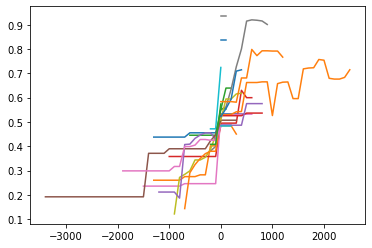

In [56]:
Snippets_DF = Snippets_DF.reset_index(drop = True)

Snippets_DF["PC1"] = (Snippets_DF.SPC - Minimum)/(Maximum-Minimum)

for n in set(sorted(Snippets_DF.NGA)):
    
    Snippet_n = Snippets_DF.query("NGA == @n")
    print(n, Snippet_n.shape)
    plt.plot(Snippet_n.RelTime, Snippet_n.PC1, label = n)
#plt.legend()
plt.show()

## Now the snippets for political continuity

In [57]:
#Snippets_DF = pd.read_csv("SPC1Dat.Relation.Continuity.csv", index_col=False)
Snippets_Pol_DF = pd.read_excel("SPC1_Final.xlsx")
Snippets_Pol_DF = Snippets_Pol_DF.fillna("no")
Snippets_Pol_DF = Snippets_Pol_DF.rename({"Polity.Cont":"Polity_Cont"}, axis = 1)
del Snippets_Pol_DF["Notes"]
print(Snippets_Pol_DF.head())


continuous = set(("StartSeq", "continuity"))
Snippets_Pol_DF = Snippets_Pol_DF.query("Polity_Cont in @continuous")
Snippets_Pol_DF = Snippets_Pol_DF.reset_index(drop = True)
Snippets_Pol_DF

               NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
0  Basin of Mexico  MxArch* -6000      no  3.210005           no          no
1  Basin of Mexico  MxArch* -5900      no  3.210005           no          no
2  Basin of Mexico  MxArch* -5800      no  3.210005           no          no
3  Basin of Mexico  MxArch* -5700      no  3.210005           no          no
4  Basin of Mexico  MxArch* -5600      no  3.210005           no          no


,NGA,PolID,Time,RelTime,SPC,Culture.Cont,Polity_Cont
0,Basin of Mexico,MxClass,100,-600.0,4.958509,StartSeq,StartSeq
1,Basin of Mexico,MxClass,200,-500.0,4.958509,continuity,continuity
2,Basin of Mexico,MxClass,300,-400.0,4.958509,continuity,continuity
3,Basin of Mexico,MxClass,400,-300.0,4.958509,continuity,continuity
4,Basin of Mexico,MxClass,500,-200.0,4.958509,continuity,continuity
...,...,...,...,...,...,...,...
133,Upper Egypt,EgOldK2,-2300,800.0,6.268058,continuity,continuity
134,Upper Egypt,EgOldK2,-2200,900.0,6.268058,continuity,continuity
135,Valley of Oaxaca,EsHabsb,1600,0.0,7.878041,StartSeq,StartSeq
136,Valley of Oaxaca,EsHabsb,1700,100.0,7.878041,continuity,continuity


In [58]:


for n in set(Snippets_Pol_DF.NGA):
    
    print(Snippets_Pol_DF.query("NGA == @n"))
    print("\n")

                      NGA    PolID  Time RelTime      SPC Culture.Cont  \
98   Southern Mesopotamia  IqEDyn* -2900     0.0  5.48286   continuity   
99   Southern Mesopotamia  IqEDyn* -2800   100.0  5.48286   continuity   
100  Southern Mesopotamia  IqEDyn* -2700   200.0  5.48286   continuity   
101  Southern Mesopotamia  IqEDyn* -2600   300.0  5.48286   continuity   
102  Southern Mesopotamia  IqEDyn* -2500   400.0  5.48286   continuity   
103  Southern Mesopotamia  IqEDyn* -2400   500.0  5.48286   continuity   

    Polity_Cont  
98     StartSeq  
99   continuity  
100  continuity  
101  continuity  
102  continuity  
103  continuity  


      NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
15  Crete  GrCrPre -3000 -1300.0  3.854425     StartSeq    StartSeq
16  Crete  GrCrPre -2900 -1200.0  3.854425   continuity  continuity
17  Crete  GrCrPre -2800 -1100.0  3.854425   continuity  continuity
18  Crete  GrCrPre -2700 -1000.0  3.854425   continuity  continuity
19  Crete  Gr

57  Kansai  JpKofun   500   200.0  5.844284   continuity  continuity


                NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
8   Cambodian Basin  KhFunaE   300     0.0  5.783213     StartSeq    StartSeq
9   Cambodian Basin  KhFunaE   400   100.0  5.783213   continuity  continuity
10  Cambodian Basin  KhFunaE   500   200.0  5.783213   continuity  continuity
11  Cambodian Basin  KhFunaL   600   300.0  5.768527   continuity  continuity


               NGA    PolID  Time RelTime       SPC Culture.Cont Polity_Cont
45  Ghanaian Coast  GhAshnE  1600  -200.0  4.735678     StartSeq    StartSeq
46  Ghanaian Coast  GhAshnE  1700  -100.0  4.735678   continuity  continuity
47  Ghanaian Coast  GhAshnL  1800     0.0  5.724511   continuity  continuity




#### Manual discarding

- the second Susiana sequence np.arange(121, 125)
- second Konya series [72,73]

In [59]:
Snippets_Pol_DF = Snippets_Pol_DF.drop(labels = np.arange(121,125), axis = 0) # Susiana
Snippets_Pol_DF = Snippets_Pol_DF.drop(labels = [72,32], axis = 0) # Konya

# Redo the Logistic Curve fit with the snippets

## Cultural Continuity

In [60]:
Snippets_DF["PC1"] = (Snippets_DF.SPC - Minimum)/(Maximum-Minimum)


X, y = Snippets_DF["RelTime"].to_numpy(), Snippets_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0 = p0)  # Old starting guess

P0 = np.array((a_, b_, c_, d_))
np.set_printoptions(suppress=True)

print("Full data:",np.round(p0,3))
print("Snippets:",np.round(P0,3))

Full data: [0.641 0.153 8.102 0.01 ]
Snippets: [ 0.481  0.24  12.949 -0.017]


Basin of Mexico 8
Cambodian Basin 13
Central Java 5
Crete 17
Cuzco 3
Deccan 1
Galilee 9
Ghanaian Coast 3
Kachi Plain 22
Kansai 5
Konya Plain 17
Latium 12
Middle Ganga 3
Middle Yellow River Valley 38
Niger Inland Delta 3
Orkhon Valley 20
Paris Basin 10
Sogdiana 2
Southern Mesopotamia 19
Susiana 21
Upper Egypt 33
Valley of Oaxaca 2
Yemeni Coastal Plain 3


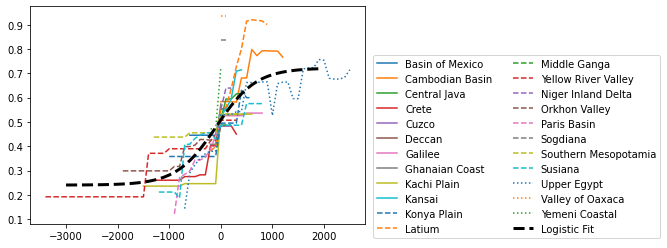

In [61]:
style = "-"
Snippet_Lengths = list()
for n in sorted(list(set(Snippets_DF["NGA"]))):
    name = n
    smalldf = Snippets_DF.loc[Snippets_DF["NGA"]==n]
 
    # some abbreviations
    if n=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if n == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(smalldf["RelTime"], smalldf["PC1"], style,label=name)
    print(n, smalldf.shape[0])
    Snippet_Lengths += [smalldf.shape[0]]
    
        
    # Change plotting style
    if n == "Kansai":
        style = "--"
    if n == "Susiana":
        style = ":"
TimeRange = np.arange(-3000,2000,100)
New_Fit = f(TimeRange/T, a_, b_, c_, d_)
plt.plot(TimeRange, New_Fit, "--",label="Logistic Fit", c="k", linewidth = 3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [62]:
np.mean(np.array(Snippet_Lengths))

11.695652173913043

### Polity

In [63]:
min(Snippets_Pol_DF.SPC - Minimum), max(Snippets_Pol_DF.SPC - Minimum),(Maximum-Minimum)

(1.1146989342580702, 5.5773821993567605, 5.967543007538761)

Full data: [0.641 0.153 8.102 0.01 ]
Snippets Culture: [ 0.481  0.24  12.949 -0.017]
Snippets Polity: [ 0.301  0.283 30.341 -0.049]
Basin of Mexico 8
Cambodian Basin 4
Central Java 3
Crete 17
Cuzco 2
Deccan 1
Galilee 9
Ghanaian Coast 3
Kachi Plain 7
Kansai 3
Konya Plain 15
Latium 5
Middle Ganga 3
Middle Yellow River Valley 4
Niger Inland Delta 3
Orkhon Valley 3
Paris Basin 4
Sogdiana 2
Southern Mesopotamia 6
Susiana 17
Upper Egypt 10
Valley of Oaxaca 2
Yemeni Coastal Plain 1


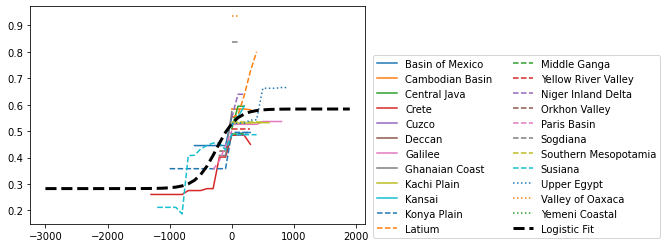

In [64]:
Snippets_Pol_DF["PC1"] = (Snippets_Pol_DF.SPC - Minimum)/(Maximum-Minimum)

Snippet_Pol_Lengths = list()

X, y = Snippets_Pol_DF["RelTime"].to_numpy(), Snippets_Pol_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data


(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0 = p0)  # Old starting guess

P0_Polity = np.array((a_, b_, c_, d_))
np.set_printoptions(suppress=True)

print("Full data:",np.round(p0,3))
print("Snippets Culture:",np.round(P0,3))
print("Snippets Polity:", np.round(P0_Polity,3))

style = "-"

for n in sorted(list(set(Snippets_Pol_DF["NGA"]))):
    smalldf = Snippets_Pol_DF.loc[Snippets_Pol_DF["NGA"]==n]
    name = n
    
    # some abbreviations
    if n=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if n == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(smalldf["RelTime"], smalldf["PC1"], style, label=name)
    print(n, smalldf.shape[0])
    Snippet_Pol_Lengths += [smalldf.shape[0]]
    # Change plotting style
    if n == "Kansai":
        style = "--"
    if n == "Susiana":
        style = ":" 


TimeRange = np.arange(-3000,2000,100)
New_Fit = f(TimeRange/T, a_, b_, c_, d_)
plt.plot(TimeRange, New_Fit, "--",label="Logistic Fit", c="k", linewidth = 3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [65]:
np.mean(np.array(Snippet_Pol_Lengths))

5.739130434782608

# Attempt to Show the Results

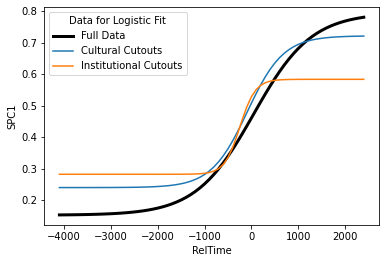

In [66]:

T_start = -4100
x_show = np.arange(T_start,2500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

plt.plot(x_show*T, y_hat, label="Full Data", c="k", linewidth=3)
plt.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]), label="Cultural Cutouts" )
plt.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
        label="Institutional Cutouts")
plt.xlabel("RelTime")
plt.ylabel("SPC1")
plt.legend(title="Data for Logistic Fit")

plt.show()

C:\Users\Tobias\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


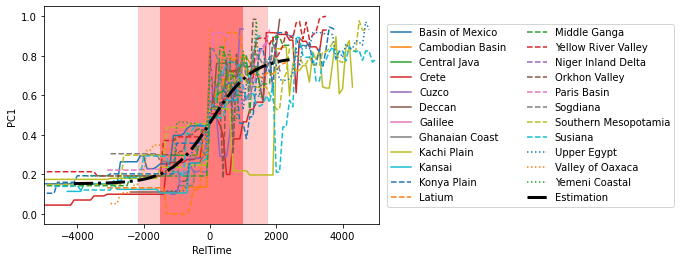

In [67]:

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    # Change plotting style
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
        
plt.scatter([-15000,6500], [0.0,1.0], c="white")    
plt.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
plt.ylabel("PC1")
plt.xlabel("RelTime")

T1_scaled, T2_scaled = T*t_1, T*t_2
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T*T1_1sigma["x"], T*T2_1sigma["x"], facecolor='r', alpha=0.2)

#plt.axhline(Thresh1, label="3 Sigma")
#plt.axhline(Thresh2)

#plt.axhline(Thresh1_1sigma,linestyle = "--", label="1 Sigma")
#plt.axhline(Thresh2_1sigma,linestyle = "--")

plt.xlim(-5000,5099)

lgd = plt.legend(ncol = 2,
                bbox_to_anchor=[1.01, 0.5], loc='center left')#bbox_to_anchor=(1.01, 0.95), ncol=2)

plt.savefig("VariousSigmas.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [68]:
T2_scaled - T1_scaled, T2_1sigma.x*T - T*T1_1sigma.x

(array([2479.38935273]), array([3905.0873487]))

In [69]:

print("Most of the cultural evolution takes place in a time interval of ", np.round((T2_scaled-T1_scaled)), "years.")

Most of the cultural evolution takes place in a time interval of  [2479.] years.


## Out-of-Sample prediction
To evaluate quality of the fit.

In [70]:
int(len(list(set(Snippets_DF.NGA)))/2)

11

In [71]:
Selection = np.random.choice(list(set(Snippets_DF.NGA)), 
                 size=int(len(list(set(Snippets_DF.NGA)))/2), 
                 replace = False)

print(Selection)

print(Snippets_DF.query("NGA in @Selection"))
print(Snippets_DF.query("NGA not in @Selection"))

['Cambodian Basin' 'Galilee' 'Valley of Oaxaca' 'Deccan' 'Middle Ganga'
 'Basin of Mexico' 'Cuzco' 'Middle Yellow River Valley'
 'Yemeni Coastal Plain' 'Central Java' 'Upper Egypt']
                      NGA    PolID  Time RelTime       SPC Culture_Cont  \
0         Basin of Mexico  MxClass   100  -600.0  4.958509     StartSeq   
1         Basin of Mexico  MxClass   200  -500.0  4.958509   continuity   
2         Basin of Mexico  MxClass   300  -400.0  4.958509   continuity   
3         Basin of Mexico  MxClass   400  -300.0  4.958509   continuity   
4         Basin of Mexico  MxClass   500  -200.0  4.958509   continuity   
..                    ...      ...   ...     ...       ...          ...   
264      Valley of Oaxaca  EsHabsb  1600     0.0  7.878041     StartSeq   
265      Valley of Oaxaca  EsHabsb  1700   100.0  7.878041   continuity   
266  Yemeni Coastal Plain  YeZiyad   900  -200.0  5.115125     StartSeq   
267  Yemeni Coastal Plain  YeZiyad  1000  -100.0  5.115125   continu

##### Back to the culture continuity (else not enough data for estimates)

In [72]:
L = len(Snippets_DF["RelTime"].to_numpy())
X, y = Snippets_DF["RelTime"].to_numpy(), Snippets_DF["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

C_list = list()
RhoSqList = list()
n_split = 1000
for i in range(1000):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X[Selection]
    y_train = y[Selection]
    
    test_indx = np.ones(len(X), bool)
    test_indx[Selection]=0
    y_test = y[test_indx]
    X_test = X[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train,
                                            p0 = p0) # initial guess to ensure c > 0
    #print((a1_, b1_, c1_, d1_))
    C_list.append(c1_)
    RhoSqList.append(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

In [73]:
print("Results of Out-of-sample prediction")
np.mean(RhoSqList), np.std(RhoSqList)

Results of Out-of-sample prediction


(0.7059717476152002, 0.0305309337867566)

## Bootstrapping

First round of bootstrap: estimate many parameter values for a and b and the standard deviations for a, b a+b. This allows to compute the thresholds of the plateaus.

In [74]:
np.random.seed(4321)
random.seed(4321)
nBT = 20 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters
NGA_list = list(set(Snippets_DF["NGA"]))


for i in range(nBT):
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Snippets_DF.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Snippets_DF.query("NGA== @n")])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0, maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["PC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    #print(a_, b_, c_, d_)
    #print("-----------------")
#print(Params.round(2))

In [75]:
print(Params.round(2))

for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    print("Parameter", P)
    print("Mean", np.mean(Ps), " and Median", np.median(Ps))
    print("50% centred quantiles", np.quantile(Ps, 0.25), 
          np.quantile(Ps, 0.75))
    print("90% centred quantiles", np.quantile(Ps, 0.05), 
          np.quantile(Ps, 0.95))
    print("\n")
    #plt.hist(Ps,bins=20, density= True)
    #plt.plot(P_range, KDE, c="k")
    #plt.title("Parameter "+str(P))
    #plt.show()

      a     b      c     d
0  0.47  0.25  15.17 -0.00
0  0.93  0.18   6.64  0.06
0  0.66  0.21  11.44  0.02
0  0.52  0.24  13.27  0.00
0  0.43  0.28  18.94 -0.00
0  0.47  0.27  15.95  0.00
0  0.56  0.22  11.32  0.01
0  0.67  0.22   8.82  0.01
0  0.47  0.24  14.63 -0.03
0  0.40  0.27  15.48 -0.03
0  0.65  0.26  10.75  0.04
0  1.19  0.19   5.96  0.18
0  0.36  0.29  18.14 -0.04
0  0.64  0.22   9.44  0.03
0  1.46  0.18   6.78  0.19
0  3.01  0.17   4.05  0.53
0  0.39  0.34  21.28  0.00
0  0.53  0.22   9.33 -0.03
0  0.44  0.27  18.12 -0.03
0  0.51  0.21   8.91 -0.02
Parameter a
Mean 0.7377754252580296  and Median 0.522577148783923
50% centred quantiles 0.4599598860780933 0.6625538886925163
90% centred quantiles 0.3896638537873956 1.5384096780458791


Parameter b
Mean 0.2361293577265669  and Median 0.22956601797374715
50% centred quantiles 0.21240318335804276 0.26722835831035635
90% centred quantiles 0.1796580240911771 0.2955010868444717


Parameter c
Mean 12.219520935330744  and Median 11.37

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

Maybe this works better if we set d=0 (as indicated by the empirical quantiles)?

In [76]:
print(np.mean(Params["b"]), np.std(Params["b"]), np.median(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]),np.median(Params["b"]+Params["a"]))

0.2361293577265669 0.041626260440782964 0.22956601797374715
0.9739047829845966 0.5627060931415429 0.751491373786876


In [77]:
quantile_a1 = np.quantile(Params["a"], 0.025)#
quantile_a2 = np.quantile(Params["a"], 0.975)


(Params["b"]+Params["a"]), Params[["a","b"]].query("a < @quantile_a2 & a > @quantile_a1 ").sum(axis =1).mean()


A_plus_B_df_quantile = Params[["a","b"]].query("a < @quantile_a2 & a > @quantile_a1 ").sum(axis =1)
A_plus_B_df_quantile.mean(), A_plus_B_df_quantile.std()

(0.8690058855367759, 0.2608819844385442)

In [78]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Q1 =  0.84 # 1-1sigma
Q2 =  0.16 # 1sigma
Thresh1 = np.quantile(Params["b"], Q1) #np.quantile(Params["b"], ) + np.std(Params["b"])
Thresh2 = np.quantile(Params["b"]+Params["a"], Q2)#np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)

def f1(x):
    # first threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

def f2(x):
    # second threshold
    return(f(x, P0[0], P0[1], P0[2], P0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

print("T1, T2", T1, T)
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

0.2361293577265669 0.041626260440782964
0.9739047829845966 0.5627060931415429
0.27239058194438875 0.7048577030523724
T1, T2     fjac: array([[-1.]])
     fun: array([-0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-0.])
       r: array([-0.38635311])
  status: 1
 success: True
       x: array([-0.22158485]) 5000
Most of the cultural evolution takes place in a time interval of  2306.0 years.


## Bootstrapping the Time Interval

Now we can repeat this task, but 

-> Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

In [79]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


np.random.seed(1234)
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_list,k=len(NGA_list))
    Data_Bootstrap = pd.DataFrame(columns = Snippets_DF.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Snippets_DF[Snippets_DF["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["PC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, P0,maxfev=10000) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        #print(a_, b_, c_, d_, T1, T2)
        #print("-----------------")
print(Successes)
print(Params2.round(2))

C:\Users\Tobias\AppData\Local\Temp/ipykernel_8276/652433116.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


561
       a     b      c     d    T1    T2
0   0.52  0.22   8.93 -0.02 -0.27  0.26
0   0.47  0.24  13.42 -0.01 -0.22  0.25
0   0.65  0.21   9.83  0.02 -0.21  0.13
0   0.95  0.19   7.11  0.12 -0.22  0.14
0   0.44  0.27  16.16 -0.01 -0.36  0.22
..   ...   ...    ...   ...   ...   ...
0   0.49  0.22  11.74 -0.02 -0.21  0.30
0   0.51  0.21   9.37 -0.05 -0.25  0.39
0   0.53  0.23  12.23 -0.00 -0.20  0.17
0   0.52  0.22   9.70 -0.01 -0.23  0.25
0   0.47  0.24  14.48 -0.01 -0.19  0.31

[561 rows x 6 columns]


In [80]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

TimeframeBT = Params2["T2"]-Params2["T1"]
print(np.mean(TimeframeBT))

# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
     u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

0.4445815002350137
Most of the cultural evolution takes place in a time interval of  2223.0 ± 559.0 years.


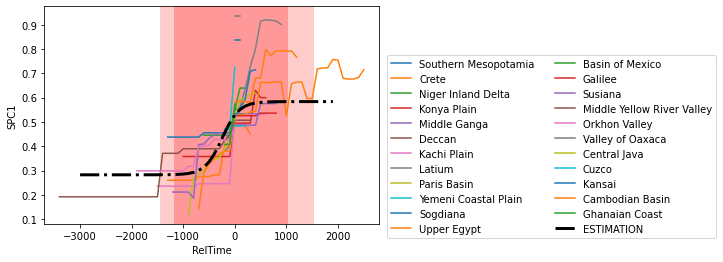

In [81]:
DF_Out_cutout = pd.DataFrame(columns=["NGA","RelTime","PC1"])

for N in list(set(Snippets_DF["NGA"])):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["PC1"], label=N)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
    
plt.plot(TimeRange, New_Fit, "-.",label="ESTIMATION", c = "k", linewidth=3)

plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped_no_Legend.pdf",dpi = 200, bbox_inches='tight')
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped",dpi = 200, bbox_inches='tight')
plt.savefig("SPC1_Time_Interval_Cutouts_Bootstrapped.pdf",dpi = 200, bbox_inches='tight')
plt.show()

Basin of Mexico 8 100.0 800.0
Cambodian Basin 13 300.0 1500.0
Central Java 5 800.0 1200.0
Crete 17 -3000.0 -1400.0
Cuzco 3 700.0 900.0
Deccan 1 -300.0 -300.0
Galilee 9 -2000.0 -1200.0
Ghanaian Coast 3 1600.0 1800.0
Kachi Plain 22 -4000.0 -1900.0
Kansai 5 300.0 700.0
Konya Plain 17 -3000.0 -1400.0
Latium 12 -700.0 400.0
Middle Ganga 3 -600.0 -400.0
Middle Yellow River Valley 38 -5000.0 -1300.0
Niger Inland Delta 3 1000.0 1200.0
Orkhon Valley 20 -1400.0 500.0
Paris Basin 10 -1000.0 -100.0
Sogdiana 2 -500.0 -400.0
Southern Mesopotamia 19 -4200.0 -2400.0
Susiana 21 -4300.0 -2300.0
Upper Egypt 33 -3800.0 -600.0
Valley of Oaxaca 2 1600.0 1700.0
Yemeni Coastal Plain 3 900.0 1100.0


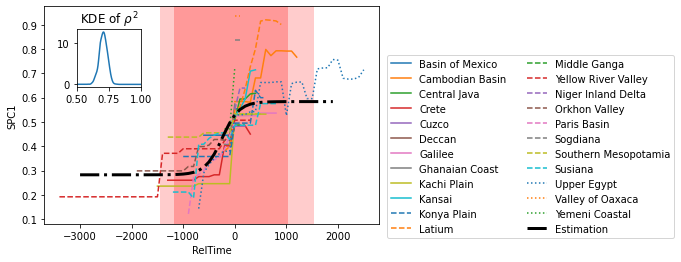

In [82]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.15, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
style ="-"

for N in sorted(list(set(Snippets_DF["NGA"]))):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]

      # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    elif N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
    else:
        name = N
        
    print(N, DF.shape[0], float(DF.head(1).Time), float(DF.tail(1).Time))
    #print(DF["RelTime"])
    ax1.plot(DF["RelTime"],   
             DF["PC1"], style,label=name)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    
ax1.plot(TimeRange, New_Fit, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.plot(np.arange(0.0,1,0.001),
    gaussian_kde(RhoSqList)(np.arange(0.0,1,0.001)))
ax2.set_title(r'KDE of $\rho^2$')
ax2.set_xlim([0.5,1.0])

plt.savefig("NEW_Cutout_Logistic_Times_Inset.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [83]:
DF.head(1).Time

266    900
Name: Time, dtype: int64

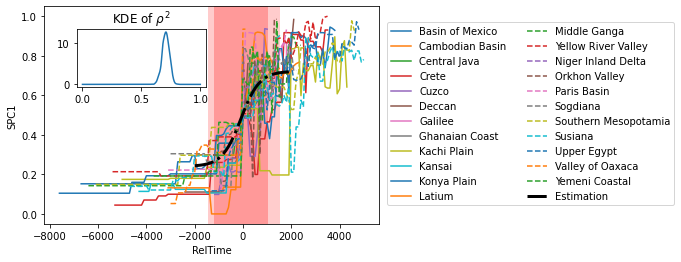

In [84]:

TimeRange = np.arange(-2000,2000,100)
New_Fit = f(TimeRange/T, P0[0], P0[1], P0[2], P0[3])


fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
style ="-"


for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Latium":
        style = "--"
    
ax1.plot(TimeRange, New_Fit, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.plot(np.arange(0.0,1,0.001),
    gaussian_kde(RhoSqList)(np.arange(0.0,1,0.001)))
ax2.set_title(r'KDE of $\rho^2$')

#plt.savefig("Cutout_Logistic_Times_Inset.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [85]:
p0

array([0.6414222 , 0.15295979, 8.10204876, 0.00981526])

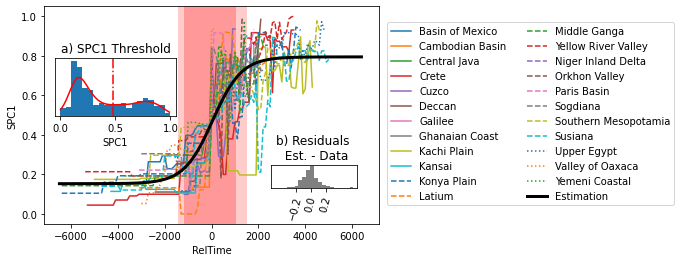

In [86]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.5, 0.28, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.65, 0.25, 0.2, 0.08]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#ax1.set_xlim([-5000, 5000])

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals \n Est. - Data")#": Est. - Data")
#ax3.set_xlabel("Est. - Data")
#ax
ax3.set_xticks([-0.2,0,0.2])
ax3.tick_params(axis='x', rotation=75)
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

#plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

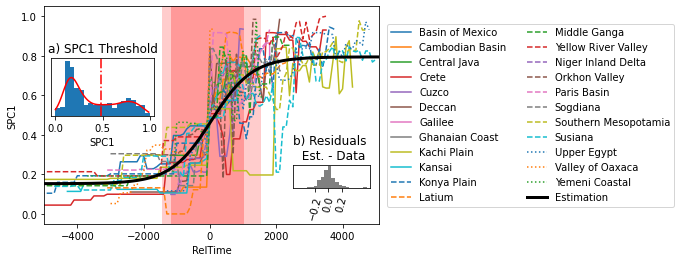

In [87]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])


ax1.set_xlim([-5000,5099])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.14, 0.5, 0.24, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.7, 0.25, 0.18, 0.08]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
#lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals \n Est. - Data")#": Est. - Data")
#ax3.set_xlabel("Est. - Data")
#ax
ax3.set_xticks([-0.2,0,0.2])
ax3.tick_params(axis='x', rotation=75)
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

lgd = ax1.legend(bbox_to_anchor=[1.01, 0.5], loc='center left',ncol=2)

plt.savefig("NEW_Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [88]:
min(y_est_Residuals-y_Residuals),max(y_est_Residuals-y_Residuals)

(-0.4736939902690752, 0.5669726191057913)

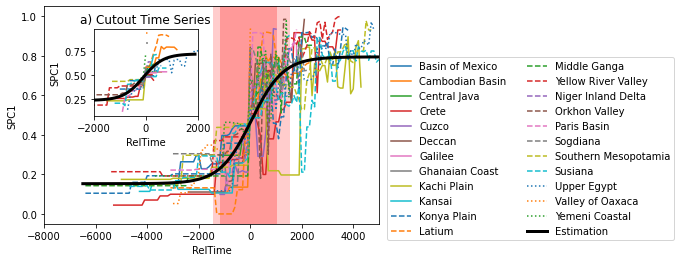

In [89]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.24, 0.5, 0.24, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

style = "-"

Colours, Styles  = dict(), dict()

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    P1 = ax1.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    #print(P1[-1].get_color())
    Colours[N] = P1[-1].get_color()
    Styles[N] = style
    
    
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"   
    #print(N)
ax1.scatter([-T_start,6500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
#lgd = ax1.legend(bbox_to_anchor=(1.01, 0.95), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
#ax1.set_xlim([-5000, 5000])
#ax1.plot(TimeRange, New_Fit, "--",c="k", linewidth = 2)

ax1.set_xlim(-8000,5000)


for N in list(set(Snippets_DF["NGA"])):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    ax2.plot(DF["RelTime"],   
             DF["PC1"], Styles[N], c = Colours[N])
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
ax2.set_xlim(-2000,2000)
ax2.set_title("a) Cutout Time Series")
ax2.set_xlabel("RelTime")
ax2.set_ylabel("SPC1")
ax2.plot(TimeRange, New_Fit, "-",label="ESTIMATION", c = "k", linewidth=3)
lgd = ax1.legend(ncol = 2,bbox_to_anchor=(1.01, 0.79))
plt.savefig("Cutout_and_Full_Logistic_Plots.pdf",
            bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [90]:
TimeRange, New_Fit

(array([-2000, -1900, -1800, -1700, -1600, -1500, -1400, -1300, -1200,
        -1100, -1000,  -900,  -800,  -700,  -600,  -500,  -400,  -300,
         -200,  -100,     0,   100,   200,   300,   400,   500,   600,
          700,   800,   900,  1000,  1100,  1200,  1300,  1400,  1500,
         1600,  1700,  1800,  1900]),
 array([0.24380346, 0.24479165, 0.24606588, 0.24770668, 0.24981574,
        0.25252046, 0.25597892, 0.26038455, 0.26596999, 0.27300837,
        0.28181019, 0.29271281, 0.30605922, 0.32216317, 0.3412596 ,
        0.36344336, 0.38860584, 0.41638596, 0.44615564, 0.47705586,
        0.50808564, 0.53822723, 0.56657576, 0.59243964, 0.61539037,
        0.63525959, 0.65209681, 0.66610786, 0.67759195, 0.68688859,
        0.69433902, 0.70026184, 0.7049401 , 0.70861658, 0.7114943 ,
        0.71373974, 0.71548757, 0.71684547, 0.71789887, 0.71871513]))

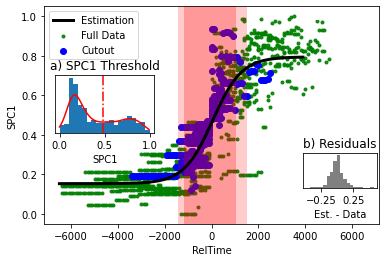

In [91]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,4000,100)/T
 
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])    # FULL REGRESSION

#y_hat = f(x_show, P0[0], P0[1], P0[2], P0[3])  # CUTOUT-REgression

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.15, 0.44, 0.23, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
left, bottom, width, height = [0.725, 0.25, 0.17, 0.12]#[0.67, 0.25, 0.22, 0.12]
ax3 = fig.add_axes([left, bottom, width, height])

Label1 = "Full Data"
Label2 = "Cutout"

ax1.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
ax1.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
ax1.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    DF = DF[DF["RelTime"]> T_start]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.scatter(DF["RelTime"],    
             DF["PC1"],marker = ".", c = "green", label=Label1, alpha = 0.9)
    Label1 = None
    
for N in sorted(list(set(Data_RT["NGA"]))):
    
    ax1.scatter(Snippets_DF.query("NGA == @N").RelTime,
            Snippets_DF.query("NGA == @N").PC1, 
            c = "blue", label =Label2)
    
    Label2 = None
    #print(N)
ax1.scatter([-T_start,4500], [0.0,1.0], c="white")    
ax1.plot(x_show*T, y_hat, "-",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend()#bbox_to_anchor=(1.01, 0.95), ncol=1)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")
#ax1.set_xlim([-5000, 5000])

ax2.hist(Data["PC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["PC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


#ax3.set_title("b) Residuals: Est. - Data")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_title("b) Residuals")#": Est. - Data")
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)
#plt.xlim(-5000,5000)

plt.savefig("NEW_Logistic_Residuals_RelTime_scattered.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

In [92]:
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)), 
      "years. The interval's start and end times are", np.round(T1_scaled), "and", np.round(T2_scaled),
      "The lower boundary's uncertainty is", np.round(T1_start_scaled), "and the upper boundary's uncertainty is", 
     np.round(T2_end_scaled), "years. Thus, the upper estimate for the time range is", np.round(T2_end_scaled-T1_start_scaled), "years.")

Most of the cultural evolution takes place in a time interval of  2223.0 years. The interval's start and end times are -1184.0 and 1039.0 The lower boundary's uncertainty is -1442.0 and the upper boundary's uncertainty is 1527.0 years. Thus, the upper estimate for the time range is 2969.0 years.


In [93]:
np.round(T2_scaled-T1_scaled)

2223.0

### Cutout vs Full Logistic Curve

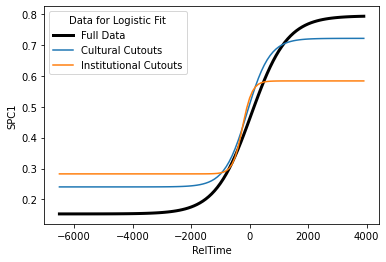

In [94]:
x_show = np.arange(T_start,4000,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

plt.plot(x_show*T, y_hat, label="Full Data", c="k", linewidth=3)
plt.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]), label="Cultural Cutouts" )
plt.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
        label="Institutional Cutouts")
plt.xlabel("RelTime")
plt.ylabel("SPC1")
plt.legend(title="Data for Logistic Fit")

plt.show()

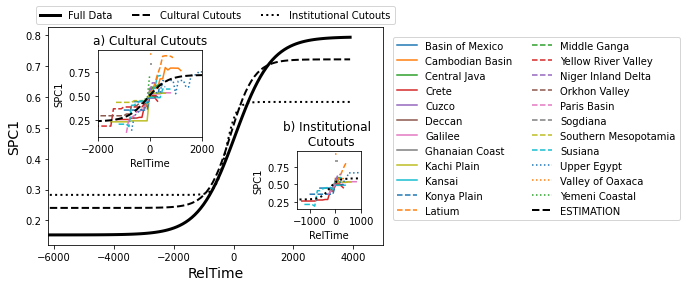

In [95]:
fig, ax1 = plt.subplots()
T_start = -6500
x_show = np.arange(T_start,6500,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.24, 0.5, 0.24, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.7, 0.25, 0.15, 0.2]
ax3 = fig.add_axes([left, bottom, width, height])


x_show = np.arange(T_start,4000,100)/T
y_hat = f(x_show, p0[0], p0[1], p0[2], p0[3])

ax1.plot(x_show*T, y_hat, label="Full Data", c="k", linewidth=3)
ax1.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]) , "--",
         c="k",label="Cultural Cutouts" , linewidth=2)
ax1.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
         ":",c="k",
        label="Institutional Cutouts", linewidth=2)
ax1.set_xlabel("RelTime", fontsize = 14)
ax1.set_ylabel("SPC1", fontsize = 14)
lgd = ax1.legend(bbox_to_anchor=(1.05, 1.12), ncol=3)
ax1.set_xlim(-6200, 5000)


style = "-"
for N in sorted(list(set(Snippets_DF["NGA"]))):
    DF = Snippets_DF[Snippets_DF["NGA"] == N]
    
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax2.plot(DF["RelTime"],   
             DF["PC1"], Styles[N], c = Colours[N],label=name)
    DF_Out_cutout = pd.concat((DF_Out_cutout, DF[["NGA", "RelTime", "PC1"]]))
    #print(N)
ax2.set_xlim(-2000,2000)
ax2.set_title("a) Cultural Cutouts")
ax2.set_xlabel("RelTime")
ax2.set_ylabel("SPC1")
ax2.plot(x_show*T,f(x_show, P0[0], P0[1], P0[2], P0[3]), "--",label="ESTIMATION", c = "k", linewidth=2)
plt.savefig("Cutout_and_Full_Logistic_Plots.pdf",
            bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')






for n in sorted(list(set(Snippets_Pol_DF["NGA"]))):
    smalldf = Snippets_Pol_DF.loc[Snippets_Pol_DF["NGA"]==n]
    ax3.plot(smalldf["RelTime"], smalldf["PC1"], Styles[n], c = Colours[n])
ax3.plot(x_show*T, f(x_show, P0_Polity[0], P0_Polity[1], P0_Polity[2], P0_Polity[3]),
         ":",c="k", linewidth=2)
ax3.set_xlim([-1500,1000])
ax3.set_title("b) Institutional \n Cutouts")
ax3.set_xlabel("RelTime")
ax3.set_ylabel("SPC1")

#ax1.set_ylim([0,1])

lgd = ax2.legend(ncol = 2,
                bbox_to_anchor=[2.8, 0.1], loc='center left')

plt.savefig("Compare_Cutouts.pdf", dpi=300, bbox_inches="tight")
plt.show()

#### Latium Example

In [96]:
Lat = Data.query("NGA == 'Latium'")


In [97]:
Lat.loc[:,"RelTime"] = (Lat.Time + 500).to_numpy()
Lat.head()

C:\Users\Tobias\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,NGA,PolID,Time,PC1,Culture.Cont,Polity.Cont,Notes,RelTime
622,Latium,ItLatCA,-3600,0.131959,NaN,NaN,NaN,-3100
623,Latium,ItLatCA,-3500,0.131959,NaN,NaN,NaN,-3000
624,Latium,ItLatCA,-3400,0.131959,NaN,NaN,NaN,-2900
625,Latium,ItLatCA,-3300,0.131959,NaN,NaN,NaN,-2800
626,Latium,ItLatCA,-3200,0.131959,NaN,NaN,NaN,-2700


In [98]:
Lat.query("RelTime == 0").PC1, float(Lat.query("RelTime == 0").Time)

(653    0.551834
 Name: PC1, dtype: float64,
 -500.0)

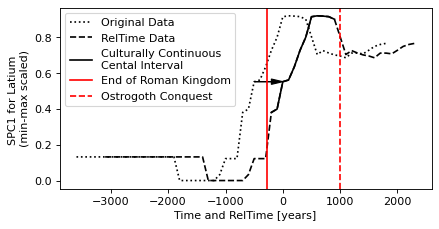

In [99]:
plt.figure(figsize=(6, 3), dpi=80)
plt.plot(Lat.Time, Lat.PC1, ":", c="k", label="Original Data")
plt.plot(Lat.RelTime, Lat.PC1, "--", c="k", label="RelTime Data")

Tzero = -500

plt.arrow(x=Tzero,
          y= 0.552, 
          dx = np.abs(Tzero), dy=0.0,
         length_includes_head=True,
         head_width = 0.03,
         head_length = 200,color = "k")

Lat_Relevant = Lat.query("Time > -770 & Time < 500")
plt.plot(Lat_Relevant.RelTime, Lat_Relevant.PC1, c="k", label="Culturally Continuous \nCental Interval")
plt.axvline(-770-Tzero, c="red", label="End of Roman Kingdom")
plt.axvline(500-Tzero,linestyle ="--", c="red", label="Ostrogoth Conquest")
plt.legend()
plt.xlabel("Time and RelTime [years]")
plt.ylabel("SPC1 for Latium \n(min-max scaled)")
plt.savefig("Latium_Transformation_redone.pdf", dpi= 200, bbox_inches="tight")

In [100]:
len(LargeNGAs), len(SmallNGAs)

(23, 12)

In [101]:
Large = list()
Small = list()

for n in LargeNGAs:
    Large += [Data.query("NGA == @n").shape[0]]
    
    
for n in SmallNGAs:
    Small += [Data.query("NGA == @n").shape[0]]
    

In [102]:
np.mean(np.array(Large)),np.mean(np.array(Small)) 

(57.34782608695652, 6.416666666666667)

In [103]:
np.mean(np.array(Large)) *len(Large) + len(Small)*np.mean(np.array(Small)) 

1396.0

## Referee Requests

- ReLU
- Predict 2000 years

In [104]:
def ReLU(x, threshold, slope, offset):
    
    return(  (x>threshold) *   slope * (x-threshold) + offset)


In [105]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["PC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X # normalisation of the data
print(len(y), len(X), Data_RT.shape)


1319 1319 (1319, 7)


In [106]:
(threshold_, slope_, offset_), _ = opt.curve_fit(ReLU, X, y,p0 = (0,1,0.01))
(threshold_, slope_, offset_)

(-2260.163950535989, 0.0001295913214323547, 0.15535512270474539)

In [107]:
1/slope_

7716.566116828969

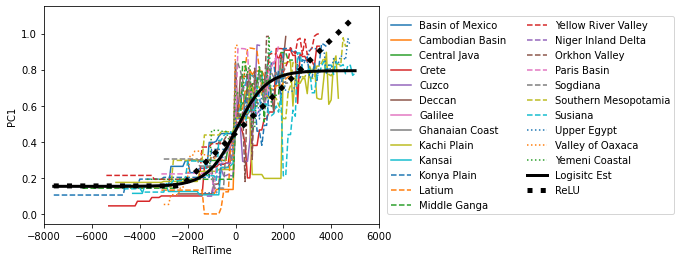

In [108]:
x_show = np.linspace(Data_RT["RelTime"].min(), Data_RT["RelTime"].max())/5000

style = "-"

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    plt.plot(DF["RelTime"],    
             DF["PC1"],style, label=name)
    
    # Change plotting style
    if N == "Kansai":
        style = "--"
    if N == "Susiana":
        style = ":"  
        
plt.scatter([-15000,6500], [0.0,1.0], c="white")    
plt.plot(x_show*T, f(x_show, p0[0], p0[1], p0[2], p0[3]), "-",label="Logisitc Est", c = "k", linewidth=3)
plt.plot(x_show*T, ReLU(x_show*T, threshold_, slope_ ,offset_), ":",label="ReLU", c = "k", linewidth=5)

plt.ylabel("PC1")
plt.xlabel("RelTime")
plt.xlim(-8000,6000)

lgd = plt.legend(ncol = 2,
                bbox_to_anchor=[1.01, 0.5], loc='center left')#bbox_to_anchor=(1.01, 0.95), ncol=2)

plt.savefig("ReLU_vs_Logistic_in_sample.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

### Now Predict the last m Years (if possible)

Referee suggested 2000, but I think this might delete too much data

In [181]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

m = 10  # how many values in the future?

number_TimeSeries = 0

for N in sorted(list(set(Data_RT["NGA"]))):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    
    if DF.shape[0] > 30:
        number_TimeSeries += 1
        print(N, DF.shape)
        
        X_train += DF["RelTime"].to_list()[:-m]
        X_test += DF["RelTime"].to_list()[-m:]
        
        y_train += DF["PC1"].to_list()[:-m]
        y_test += DF["PC1"].to_list()[-m:]
len(X_train), len(y_train), len(X_test), len(y_test), number_TimeSeries

Basin of Mexico (76, 7)
Cambodian Basin (31, 7)
Crete (89, 7)
Deccan (45, 7)
Kachi Plain (94, 7)
Kansai (59, 7)
Konya Plain (115, 7)
Latium (55, 7)
Middle Ganga (89, 7)
Middle Yellow River Valley (90, 7)
Orkhon Valley (34, 7)
Paris Basin (50, 7)
Sogdiana (53, 7)
Southern Mesopotamia (109, 7)
Susiana (98, 7)
Upper Egypt (62, 7)
Valley of Oaxaca (32, 7)
Yemeni Coastal Plain (54, 7)


(1055, 1055, 180, 180, 18)

In [182]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, np.array(X_train)/T, np.array(y_train))
(threshold_, slope_, offset_), _ = opt.curve_fit(ReLU, X_train, y_train,p0 = (0,1,0.01))


In [183]:
(a_, b_, c_, d_), (threshold_, slope_, offset_)

((-0.5837295895174676,
  0.7419370235974723,
  -9.338997957557678,
  -0.013701539236704054),
 (-2015.966021895931, 0.00013890889985701681, 0.15813722217201692))

In [184]:
y_hat_ReLU = ReLU(X_test, threshold_, slope_ ,offset_)
y_hat_log =  f(np.array(X_test)/T, a_, b_, c_, d_)
rhosq_ReLU =  RhoSq(y_hat = y_hat_ReLU, y_true = y_test)
rhosq_log = RhoSq(y_hat = y_hat_log, y_true = y_test)

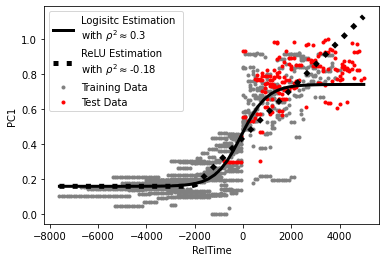

In [185]:
plt.scatter(X_train, y_train, marker= ".", c="grey", label="Training Data")
plt.scatter(X_test, y_test, marker= ".", c="red", label="Test Data")
plt.plot(x_show*T, f(x_show, a_, b_, c_, d_), "-",
         label="Logisitc Estimation \n"+ r"with $\rho^2 \approx $" + str(np.round(rhosq_log,2)), c = "k", linewidth=3)
plt.plot(x_show*T, ReLU(x_show*T, threshold_, slope_ ,offset_), ":",
         label="ReLU Estimation \n"+ r"with $\rho^2 \approx $" + str(np.round(rhosq_ReLU,2)), c = "k", linewidth=5)
plt.legend()

plt.ylabel("PC1")
plt.xlabel("RelTime")

plt.savefig("ReLU_vs_Logistic_out_of_sample.pdf",dpi=300,bbox_inches='tight')
plt.show()#plt.scatter(X_test, y_hat_ReLU, marker ="*", c="blue")


In [186]:
RhoSq(y_hat = y_hat_log, y_true = y_test), RhoSq(y_hat = y_hat_ReLU, y_true = y_test)

(0.3039630872745275, -0.17976622299119915)